In [ ]:
## Assignment 2 
## Gargi Vaidya
## Part 5. 

Policy stable
Convergence Plot of Value Iteration - 


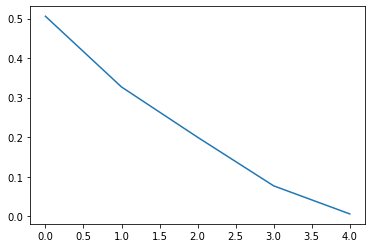

Value Function 
  [0.06874881 0.06125542 0.07426752 0.05555766 0.09171777 0.
 0.11212568 0.         0.14531312 0.24739914 0.29953819 0.
 0.         0.37986114 0.63897971 0.        ]
Policy 
 [0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]


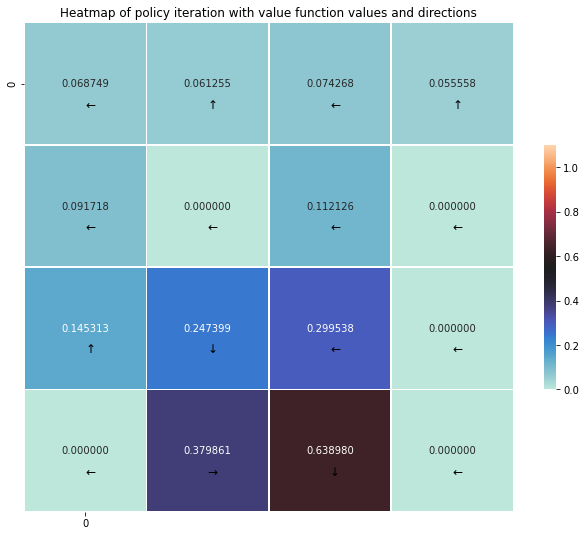

In [7]:
import gym
import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt

%matplotlib inline
import seaborn
from matplotlib.colors import LogNorm
env = gym.make('FrozenLake-v0')

# print('Number of Actions', env.nA) 
# print('Number of States ', env.nS)
# print('P[10,3]', env.P[10][3])

%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function \n ',value_func)
    print('Policy \n',policy_int)
    plt.show()

def policy_evaluate(V, pi):
    for t in range(1000): 
        V_ = np.zeros(env.nS)
        diff = 0
        for x in range(env.nS):
            a = pi[x]
            q = 0
            for i in range(len(env.P[x][a])):
                p, s_, r, done = env.P[x][a][i]
                q += p * (r + gamma * V[s_])
            V_[x] = q
        diff = linalg.norm(V_ - V, 2)
        if diff < epsilon:
#             print("Number of iterations to converge: ", t)
            break
        else:
            V = V_.copy()   
    return V

def policy_improve(pi, V, policy_stable):
    policy_stable = True
    pi_ = np.zeros(env.nS, dtype=int)
    Q_star = np.zeros((env.nS, env.nA))
    for x in range(env.nS):
        Q = []
        for a in range(env.nA):
            q = 0
            for i in range(len(env.P[x][a])):
                p, s_, r, done = env.P[x][a][i]
                q += p * (r + gamma * V[s_])
            Q.append(q)
        Q_star[x, :] = Q
        pi_[x] = int(np.argmax(np.asarray(Q)))
        if pi[x] != pi_[x]:
            policy_stable = False        
    pi = pi_.copy()
    return pi, policy_stable, Q_star

def policy_iteration(env, gamma, epsilon): 
    V = np.zeros(env.nS)
    V_ = np.zeros(env.nS)
    pi = np.zeros(env.nS, dtype=int)
    policy_stable = True
    diff = []
    for i in range(1000):        
        V_ = policy_evaluate(V, pi)
        pi, policy_stable, Q = policy_improve(pi, V_, policy_stable)
        diff.append(linalg.norm(V_ - V, 2))        
        V = V_.copy()
        if policy_stable:
            print("Policy stable")
#             print("Number of iterations to converge: ", i+1)
            print("Convergence Plot of Value Iteration - ")
            plt.plot(range(int(i)), diff[1:])
            plt.show()
            break
    return V, pi, Q

gamma = 0.9
epsilon = 1e-4
V_star, pi_star, Q_star = policy_iteration(env, gamma, epsilon)
fancy_visual(V_star, pi_star)


In [6]:
print("Optimal Q-Value Function - \n", Q_star, "\n")
print("Optimal State Value Function - \n", V_star, "\n")
print("Optimal Policy - : \n", pi_star, "\n")

Optimal Q-Value Function - 
 [[0.06876462 0.0665166  0.0665166  0.05962591]
 [0.03900127 0.0429049  0.04065688 0.06128152]
 [0.07429459 0.06868163 0.07258526 0.05732418]
 [0.03894755 0.03894755 0.0333346  0.05561485]
 [0.09173391 0.07110927 0.06421858 0.04813997]
 [0.         0.         0.         0.        ]
 [0.11214171 0.08986146 0.11214171 0.02228026]
 [0.         0.         0.         0.        ]
 [0.07110927 0.11781368 0.10173507 0.14532901]
 [0.15755228 0.24741373 0.2038198  0.13345539]
 [0.29955136 0.26591365 0.22533162 0.10785745]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18817808 0.30565225 0.379872   0.26591365]
 [0.39551371 0.63898559 0.6148887  0.53715313]
 [0.         0.         0.         0.        ]] 

Optimal State Value Function - 
 [0.06874881 0.06125542 0.07426752 0.05555766 0.09171777 0.
 0.11212568 0.         0.14531312 0.24739914 0.29953819 0.
 0.         0.37986114 0.63897971 0.        ] 

Optimal Policy - 

In [379]:
## End of Part 5.